In [6]:
import pandas as pd

# Load the dataset
data_path = "IPL_Cricket_Project.csv"
data = None  # Initialize the variable to prevent NameError

try:
    # Use the 'on_bad_lines' parameter to skip problematic lines
    data = pd.read_csv(data_path, delimiter=',', encoding='utf-8', on_bad_lines='skip')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found at {data_path}. Please check the file path.")
except pd.errors.ParserError as e:
    print(f"Error while parsing the dataset: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Ensure 'data' is not None before accessing it
if data is not None:
    # Display the first few rows
    print(data.head())
else:
    print("Dataset could not be loaded. Exiting the program.")





Dataset loaded successfully!
   id  season       city        date                        team1  \
0   1    2008  Bangalore  2008-04-18        Kolkata Knight Riders   
1   3    2008      Delhi  2008-04-19             Rajasthan Royals   
2   4    2008  Hyderabad  2008-04-22              Deccan Chargers   
3   5    2008     Jaipur  2008-04-24             Rajasthan Royals   
4   6    2008    Chennai  2008-04-26  Royal Challengers Bangalore   

                         team2            toss_winner toss_decision  result  \
0  Royal Challengers Bangalore  Kolkata Knight Riders         field  normal   
1             Delhi Daredevils       Delhi Daredevils         field  normal   
2        Kolkata Knight Riders        Deccan Chargers           bat  normal   
3              Kings XI Punjab       Rajasthan Royals         field  normal   
4          Chennai Super Kings    Chennai Super Kings         field  normal   

   dl_applied                 winner  win_by_runs  win_by_wickets  \
0           

In [7]:
# Standardizing column names (lowercase and replacing spaces with underscores)
data.columns = data.columns.str.lower().str.replace(" ", "_")

# Converting the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Filling missing values for categorical columns
categorical_columns = ['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 
                       'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2']
for col in categorical_columns:
    data[col] = data[col].fillna('Unknown')

# Dropping rows with invalid or missing dates
data = data.dropna(subset=['date'])

# Display dataset info after cleaning
print("Dataset Info After Cleaning:")
print(data.info())


Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               13 non-null     int64         
 1   season           13 non-null     int64         
 2   city             13 non-null     object        
 3   date             13 non-null     datetime64[ns]
 4   team1            13 non-null     object        
 5   team2            13 non-null     object        
 6   toss_winner      13 non-null     object        
 7   toss_decision    13 non-null     object        
 8   result           13 non-null     object        
 9   dl_applied       13 non-null     int64         
 10  winner           13 non-null     object        
 11  win_by_runs      13 non-null     int64         
 12  win_by_wickets   13 non-null     int64         
 13  player_of_match  13 non-null     object        
 14  venue          

C:\Users\Pranali\AppData\Local\Temp\ipykernel_1872\2557076772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='season', palette='viridis')


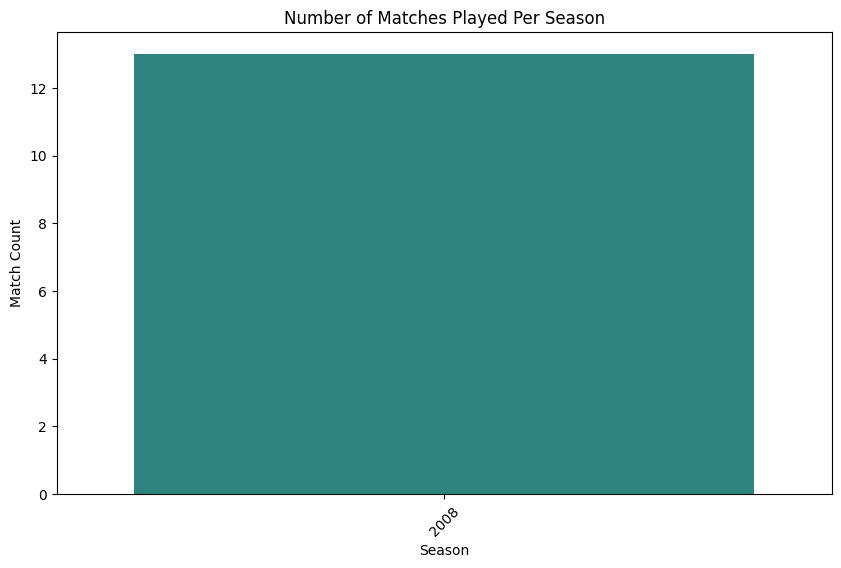

In [8]:
# Plot matches played per season
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='season', palette='viridis')
plt.title('Number of Matches Played Per Season')
plt.xlabel('Season')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Pranali\AppData\Local\Temp\ipykernel_1872\1162132818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='winner', order=data['winner'].value_counts().index, palette='coolwarm')


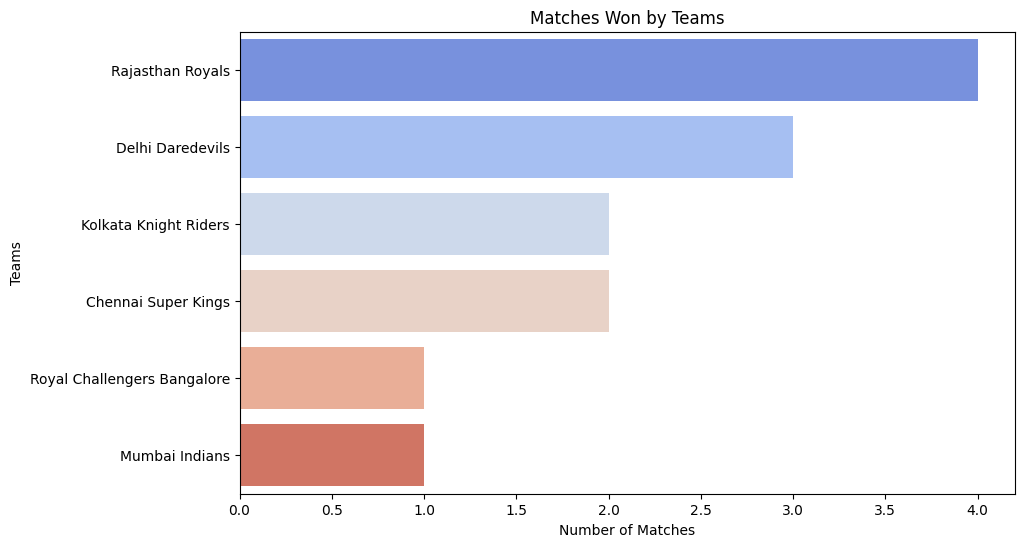

In [9]:
# Plot matches won by teams
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='winner', order=data['winner'].value_counts().index, palette='coolwarm')
plt.title('Matches Won by Teams')
plt.xlabel('Number of Matches')
plt.ylabel('Teams')
plt.show()


C:\Users\Pranali\AppData\Local\Temp\ipykernel_1872\2077389969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='toss_decision', palette='Set2')


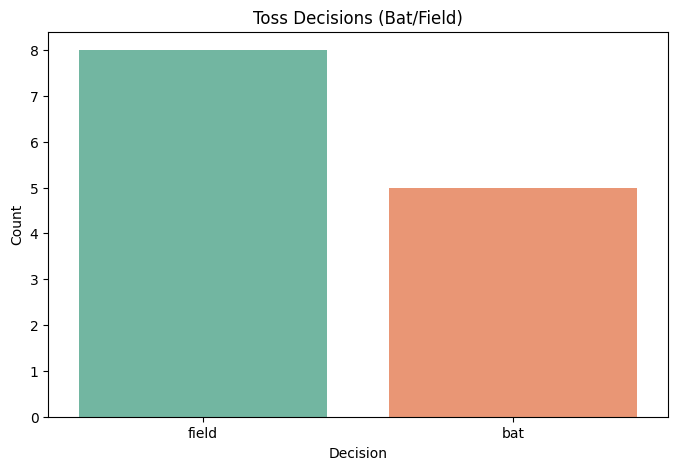

In [10]:
# Toss decisions (bat/field) analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='toss_decision', palette='Set2')
plt.title('Toss Decisions (Bat/Field)')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()


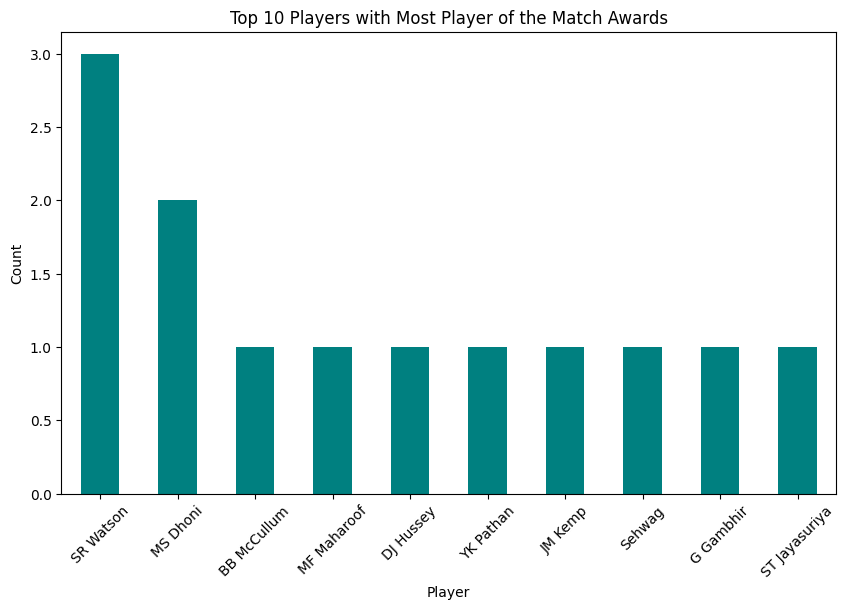

In [11]:
# Top 10 players with the most Player of the Match awards
top_players = data['player_of_match'].value_counts().head(10)

# Plotting the top players
plt.figure(figsize=(10, 6))
top_players.plot(kind='bar', color='teal')
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


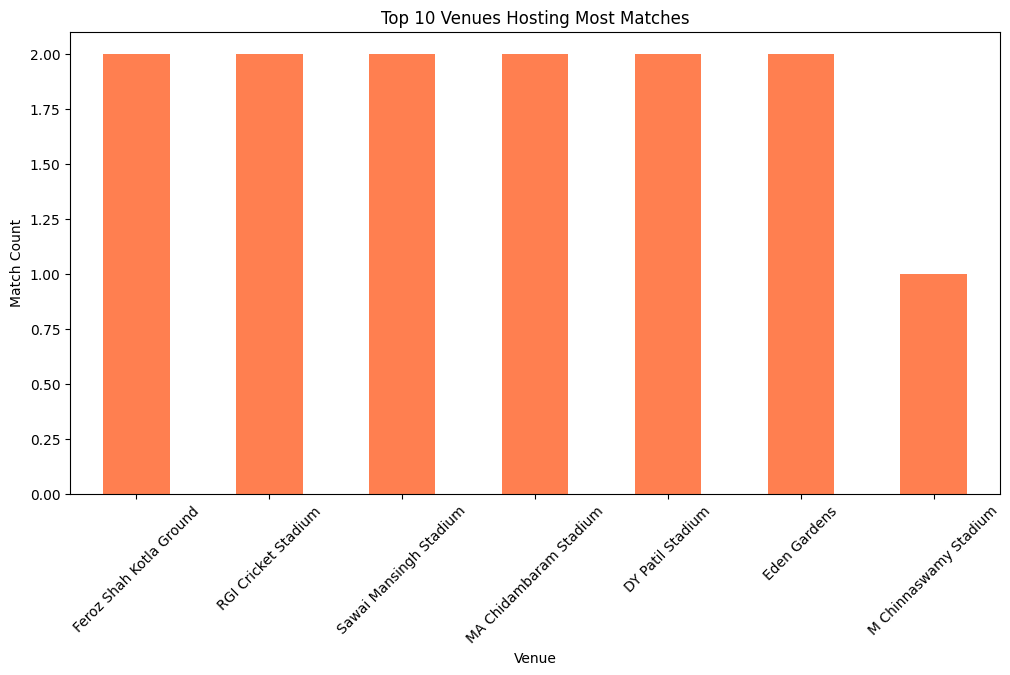

In [12]:
# Top venues hosting the most matches
top_venues = data['venue'].value_counts().head(10)

# Plotting the top venues
plt.figure(figsize=(12, 6))
top_venues.plot(kind='bar', color='coral')
plt.title('Top 10 Venues Hosting Most Matches')
plt.xlabel('Venue')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.show()


In [13]:
# Save the cleaned dataset
output_path = "Cleaned_IPL_Cricket_Project.csv"
data.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}.")


Cleaned dataset saved to Cleaned_IPL_Cricket_Project.csv.
